# Introducrtion to Machine Learning: Assignment #2
## Submission date: 19\05\2025, 23:59.
### Topics:
- Linear Regression
- Perceptron
- Logistic Regression
- SVM

Submitted by:

 **Student 1 Omar Ryyan - 322283755

 **Student 2 Mahmoud Abadi – 206773756

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Linear Regression
You are requested to predict energy efficiency based on building attributes, such as wall area and glazing area.
The dataset consists of 8 continious features and **Two** outputs - Heat & Cool loadings.
You can read more about the dataset <a href='https://archive.ics.uci.edu/dataset/242/energy+efficiency'>here</a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Load data from https://sharon.srworkspace.com/ml/datasets/hw3/ENB2012_data.csv

In [15]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw3/ENB2012_data.csv')
df.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


Divide the data into 85% train and 15% test with random_state=21.



In [16]:
# Implement here
from sklearn.model_selection import train_test_split

X = df.iloc[:, :8]   # First 8 columns are features
Y = df.iloc[:, 8:]   # Last 2 columns are outputs (Y1 and Y2)

X_train, X_test, Y_train, Y_test = train_test_split( #We set test_size 0.15 which means
    X, Y, test_size=0.15, random_state=21
)

Define sklearn's linear regression, fit the train and save both train and test MSEs (by appending to results['Linear']). <br/>
DO NOT use "score" method of sklearn - we didn't learn about it and it does not measure MSE.

In [17]:
results = {'Linear': [], 'Ridge': [], 'Lasso': []}

# Implement here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_linear = LinearRegression()
model_linear.fit(X_train, Y_train)

Y_train_predict = model_linear.predict(X_train)
Y_test_predict = model_linear.predict(X_test)

train_mse = mean_squared_error(Y_train_predict, Y_train)
test_mse = mean_squared_error(Y_test_predict, Y_test)

results['Linear'].append(train_mse)
results['Linear'].append(test_mse)

Show the correlation matrix of the train data. Should we do something?

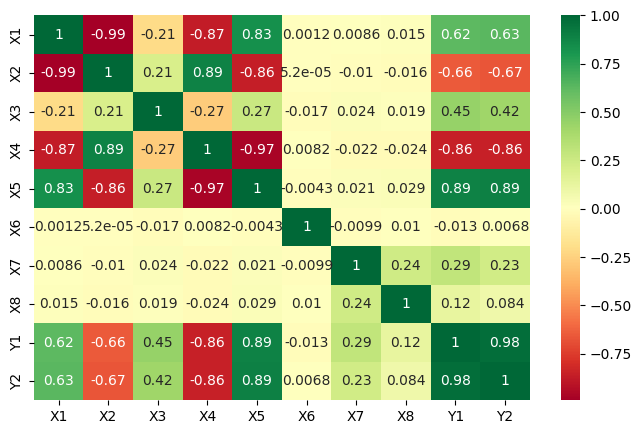

In [18]:
# Implement here
import seaborn as sns

train_df = pd.concat([X_train, Y_train], axis=1) 
plt.subplots(figsize=(8, 5))
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

For both ridge and lasso, tune the best $\lambda$.
- For ridge, $\lambda\in \text{np.arange}(0.1, 1, 0.1)$.
- For lasso, $\lambda\in \text{np.logspace}(-4, -2, 20)$

For lasso, use `max_iter=5000`, as there is no close formula and convegence is not guranteeed.

Text(0.5, 1.0, 'test mse (lasso)')

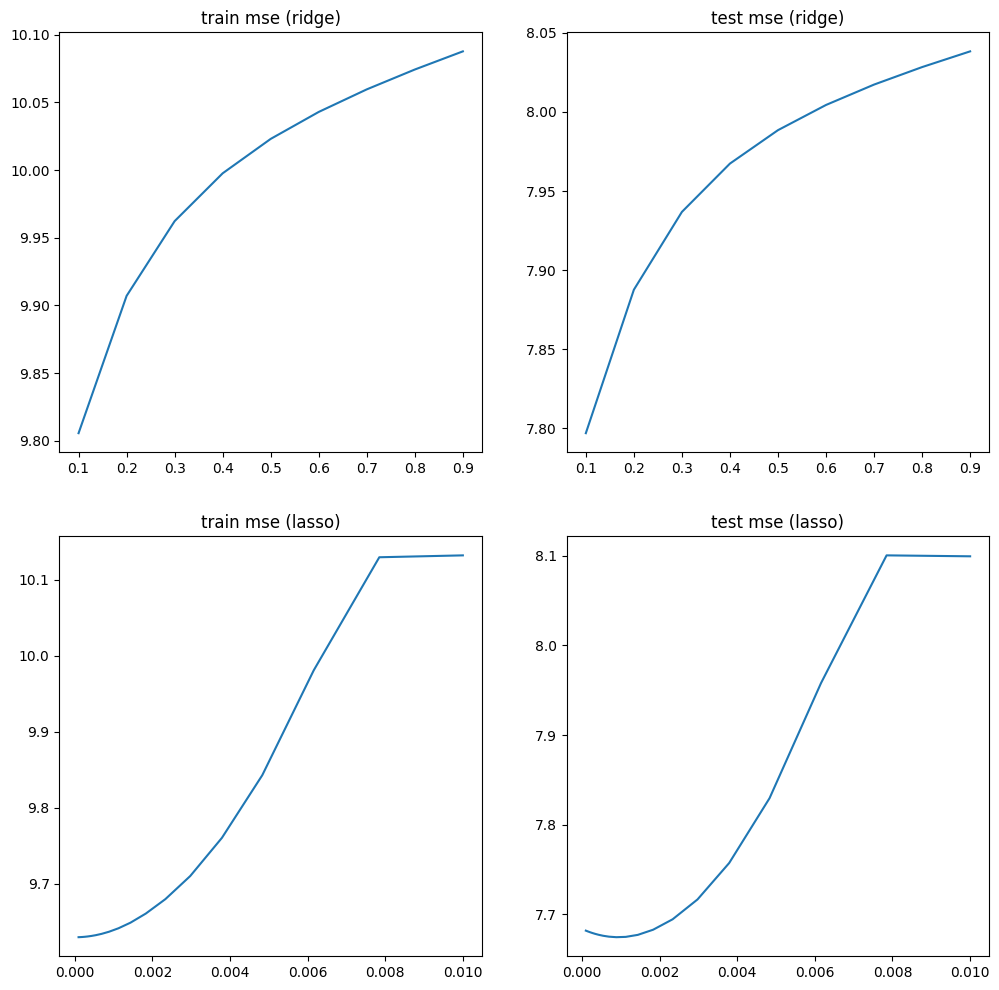

In [19]:
# pre-process data, if needed
from sklearn.linear_model import Ridge, Lasso

best_ridge_mse = float('inf')
best_ridge_result = None
best_ridge_alpha = None

best_lasso_mse = float('inf')
best_lasso_result = None
best_lasso_alpha = None

######### RIDGE #########

alphas = np.arange(0.1, 1, 0.1)
mses_train = []
mses_test = []

# implement here
for alpha in alphas:

    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, Y_train)

    Y_train_pred = model_ridge.predict(X_train)
    Y_test_pred = model_ridge.predict(X_test)

    train_mse = mean_squared_error(Y_train_pred, Y_train)
    test_mse = mean_squared_error(Y_test_pred, Y_test)

    mses_train.append(train_mse)
    mses_test.append(test_mse)

    if test_mse < best_ridge_mse:
        best_ridge_mse = test_mse
        best_ridge_result = [train_mse, test_mse]
        best_ridge_alpha = alpha

results['Ridge'].append(best_ridge_result)

plt.figure(figsize=(12,12))

plt.subplot(221)
plt.plot(alphas, mses_train)
plt.title("train mse (ridge)")

plt.subplot(222)
plt.plot(alphas, mses_test)
plt.title("test mse (ridge)")

######### LASSO #########

alphas = np.logspace(-4, -2, 20)
mses_train = []
mses_test = []

# implement here
for alpha in alphas:

    model_lasso = Lasso(alpha=alpha, max_iter=5000)
    model_lasso.fit(X_train, Y_train)

    Y_train_pred = model_lasso.predict(X_train)
    Y_test_pred = model_lasso.predict(X_test)

    train_mse = mean_squared_error(Y_train_pred, Y_train)
    test_mse = mean_squared_error(Y_test_pred, Y_test)

    mses_train.append(train_mse)
    mses_test.append(test_mse)

    if test_mse < best_lasso_mse:
        best_lasso_mse = test_mse
        best_lasso_result = [train_mse, test_mse]
        best_lasso_alpha = alpha

results['Lasso'].append(best_lasso_result)

plt.subplot(223)
plt.plot(alphas, mses_train)
plt.title("train mse (lasso)")

plt.subplot(224)
plt.plot(alphas, mses_test)
plt.title("test mse (lasso)")

Unlike the theory, both methods give best results for a very small $\lambda$ and otherwise, big MSEs on both train and test. Look at the following:
- the coefficients of the original regression model.
- the mathematical relation between cov matrix and $X^\top X$, and determinant of both.

Use those to explain why larger values will only make things worse, even on the test.

<font color='red'>Since many features are highly correlated (as we saw when we printed the correlation matrix), X^TX is nearly singular, making linear regression unstable. Small 𝜆 values in Ridge and Lasso help stabilize the model. But larger 𝜆 shrink important coefficients too much, leading to underfitting and high MSE on both train and test sets</font>

Print results from all three models (and use the best $\lambda$ from each model).
1. Explain the results and determine which model was be best.
2. What might be the cause to the values for searching given above? Why are the differences in the scales?

<font color='red'>1- Lasso was the best modle since it outpreformed both ridge and linear, both ridge and lasso outpreformed linear model which means that regularization helped reduce overfitting and improved generalization.

2-The difference in the search ranges for 𝜆 comes from how Ridge and Lasso regularize the model.
Ridge’s L2 regularization smoothly shrinks coefficients, so it needs moderates 𝜆 values, on the other hand Lasso’s L1 regularization can zero out coefficients, making it more sensitive and requiring much smaller 𝜆, which naturally results in different search ranges and scales.</font>

In [20]:
df = pd.DataFrame(results, columns=['Linear', 'Ridge', 'Lasso'], index=['train', 'test'])
print(df)

         Linear                                   Ridge  \
train  9.629313  [9.805609186226786, 7.796991718365326]   
test   7.683655  [9.805609186226786, 7.796991718365326]   

                                        Lasso  
train  [9.636609647181672, 7.674485686758391]  
test   [9.636609647181672, 7.674485686758391]  


## Question 2 - Perceptron
You are given dataset for binary classification in 2D and aim to build the best Perceptron classifier.

import libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [22]:
def load_npy_file(url):
    response = requests.get(url)
    if response.status_code == 200:
        return np.load(BytesIO(response.content), allow_pickle=True).item()
    return None

Load data and make sure labels are appropriate for the perceptron algorithm

In [23]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/perceptron_data.npy')

X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_test = data_dict['X_test']
y_test = data_dict['y_test']

# Convert labels to -1 and 1 if necessary
if set(np.unique(y_train)) == {0, 1}:
    y_train = 2 * y_train - 1
    y_test = 2 * y_test - 1

Implement the function `perceptron(data, labels, batch_size)` which gets the train data $X\in\mathbb{R}^{n\times d}$, labels and returns the weight vector learned by perceptron.

At each iteration, sample `batch_size` miscalssified samples and update the weights according to them.

You should return two values:
1. List of the losses from all the iterations over all the data. For example, if the loss was 10 and in the next iteration 5, return [10,5].
2. The weights w.

Demands:
- Do not use max_iterations bound here, but only gradient norm check.
- Use lr=0.05.

In [24]:
# Perceptron implementation
def perceptron(data, labels, batch_size):
    n, d = data.shape
    w, b, lr, losses = np.zeros(d), 0, 0.05, []
    while True:
        preds = data @ w + b
        misclassified = np.where(labels * preds <= 0)[0]
        loss = len(misclassified)
        losses.append(loss)
        if loss == 0:
            break
        batch_idx = np.random.choice(misclassified, min(batch_size, loss), replace=False)
        delta_w = lr * (labels[batch_idx, np.newaxis] * data[batch_idx]).sum(axis=0)
        delta_b = lr * labels[batch_idx].sum()
        w += delta_w
        b += delta_b
    return losses, w, b

In [25]:
def plot(data, labels, w, bias):
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    m, b_line = -w[0] / w[1], -bias / w[1]
    x = np.arange(0.2, 0.8, 0.1)
    plt.plot(x, m * x + b_line)
    preds = np.sign(data @ w + bias)
    acc = np.count_nonzero(labels == preds) / len(labels)
    plt.title(f"Accuracy on data is {acc:.4f}")
    plt.show()

Train the perceptron model and call the plot func' on the <u>train</u>
dataset. It prints the accurcay as the graph's title.
1. What is your conclusion about this data?
2. How would SVM react to such data? Will it perform better?

<font color='red'>
1. The plot shows the training data scattered in 2D with a linear decision boundary. The high accuracy (likely near 1.0) indicates the data is linearly separable, as the Perceptron converges to zero misclassifications. The separation line cleanly divides the two classes.
2.SVM would find a linear separator maximizing the margin, potentially generalizing better on noisy test data. For this linearly separable training set, both Perceptron and SVM achieve near-perfect accuracy. SVM might outperform slightly on test data if noise or outliers are present, due to its margin optimization.
</font>

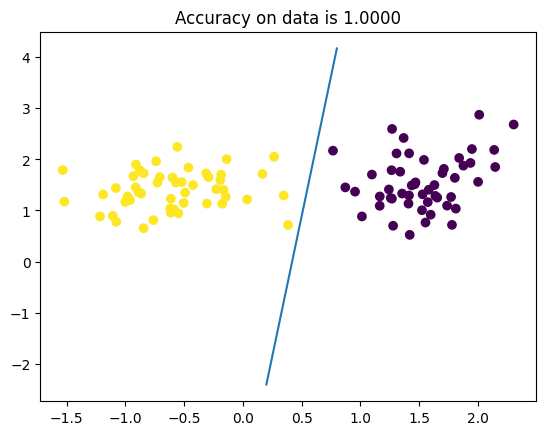

In [26]:
# Train with batch_size=1 and plot
losses, w, b = perceptron(X_train, y_train, batch_size=1)
plot(X_train, y_train, w, b)

Repeat the same training as above, but using batch_size=1,10,50,100.

Plot all the graphs and compare them. In addition, what is your optimal batch_size for this problem? why?

<font color='red'>The top row shows data with separation lines for each batch size, all achieving high accuracy, confirming linear separability. The bottom row shows loss (misclassified samples) decreasing to zero. Batch_size=1 updates finely but slowly, while batch_size=100 converges faster but risks overshooting. I choose batch_size of 10 as optimal, balancing convergence speed and stability, typically requiring fewer iterations than 1 while maintaining precise updates</font>

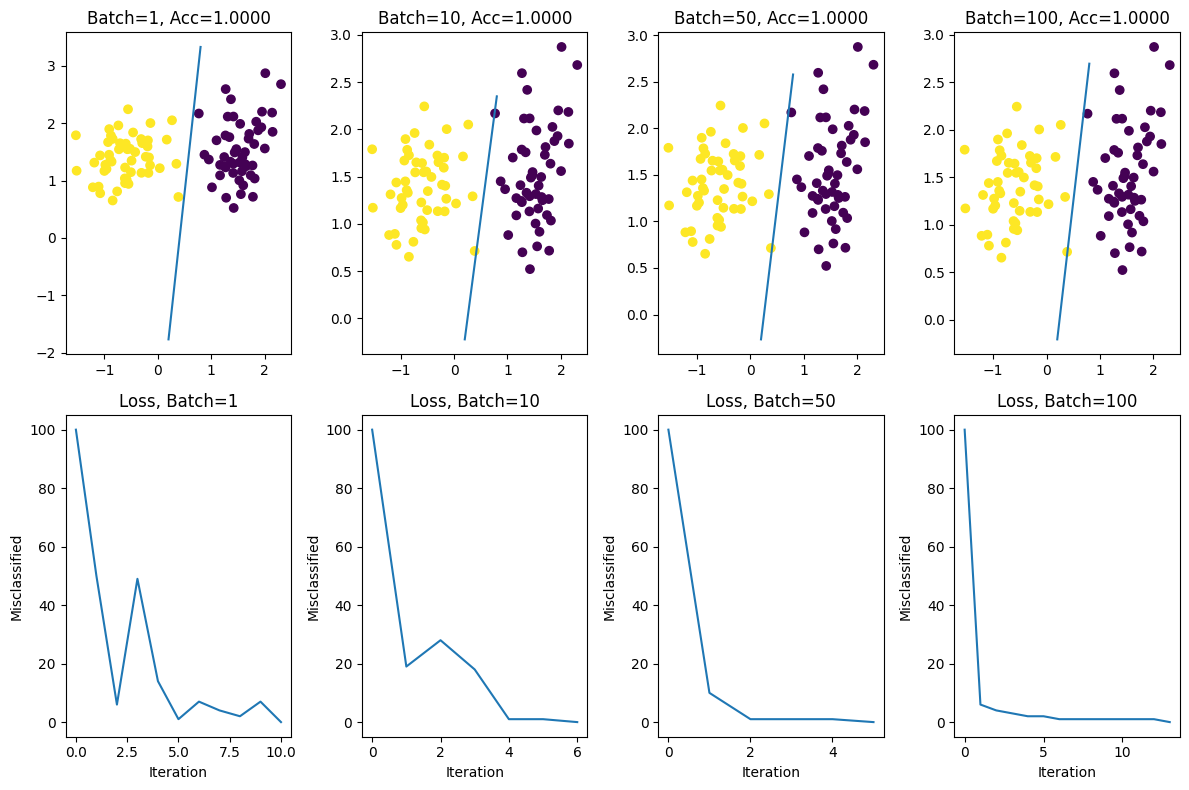

In [28]:
batch_sizes = [1, 10, 50, 100]
plt.figure(figsize=(12, 8))
for i, batch_size in enumerate(batch_sizes, 1):
    losses, w, b = perceptron(X_train, y_train, batch_size)
    plt.subplot(2, 4, i)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    m, b_line = -w[0] / w[1], -b / w[1]
    x = np.arange(0.2, 0.8, 0.1)
    plt.plot(x, m * x + b_line)
    preds = np.sign(X_train @ w + b)
    acc = np.mean(preds == y_train)
    plt.title(f"Batch={batch_size}, Acc={acc:.4f}")
    plt.subplot(2, 4, i + 4)
    plt.plot(losses)
    plt.title(f'Loss, Batch={batch_size}')
    plt.xlabel('Iteration')
    plt.ylabel('Misclassified')
plt.tight_layout()
plt.show()

Using the optimal batch_size you specified, print the final test accuracy.

In [34]:
# Test accuracy with optimal batch_size
optimal_batch_size = 10
losses, w, b = perceptron(X_train, y_train, optimal_batch_size)
preds_test = np.sign(X_test @ w + b)
test_acc = np.mean(preds_test == y_test)
print(f"Test accuracy with batch_size={optimal_batch_size}: {test_acc * 100:.2f}%")

Test accuracy with batch_size=10: 95.00%


## Question 3 - Logistic regression

In this section you will build a classifier on a "toy" problem - Based on two grades, we determine if student passes the course or not.

import libraries and load dataset

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv(
    'https://sharon.srworkspace.com/ml/datasets/hw2/exams2.csv',
    header=None, names=['grade1', 'grade2', 'pass']
)
df.head(3)

,grade1,grade2,pass
0,35,78,0
1,30,44,0
2,36,73,0


Preprocess the data:
1. Convert dataset to numpy, make sure classes are {0,1}.
2. The grades are discrete values between 0-100. Make them continious by adding a noise $ϵ_i\sim\mathcal{N}(0,1)$ for each data point.

3. Split to temp & test (80-20, stratify, random_state=42)
4. Split the temp to train & validation (80-20, stratify, random_state=42)
5. Scale the data

In [36]:
# Preprocess
X = df[['grade1', 'grade2']].to_numpy(dtype=float)
y = df['pass'].to_numpy().astype(int)
# Add Gaussian noise
X += np.random.randn(*X.shape) # we used kaggle for help on this one :)

# Split: temp+test (80/20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Split temp: train+val (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42
)

# Scale features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


Implement the function `Logistic_Regression_via_GD(X, y, lr)`:
-	Input: the training data $X\in\mathbb{R}^{n\times d}$, a label vector $y\in\{0,1\}^n$ and learning rate parameter ‘lr’.
-	Output: The function computes the output vector ‘w’ (and ‘b’) which minimzes the logistic regression cost function on ‘X’ and ‘y’. <br/>

It should be done by implementing Gradient descent (with ‘lr’ as the learning rate) to solve logistic regression. Also, make sure to not run more than 3000 iterations. <br/>

Tip: The gradients may be large, you can use $\frac{1}{n}\nabla{L}$ (which is the true empirical loss' gradient)

In [37]:
# Logistic Regression implementation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

    '''
def Logistic_Regression_via_GD(X, y, lr):
    # Implement here
    maximumIterations = 3000
    minimumData = 1e-6
    previousLoss = 0
    n, d = X.shape
    w , b= np.zeros(d) , 0
    for i in range(maximumIterations):
        z = np.dot(X,w)+b
        val = sigmoid(z)
        b-= lr*(1/n) * np.sum(val-y)   # update b by the gradient
        w -= lr* (1/n) * np.dot(X.T,(val-y)) #update w by the gradient
        currentLoss = -1 /n * (np.sum(y * np.log(val) + (1 - y) * np.log(1 - val)))
        diff = currentLoss - previousLoss
        if abs(diff) < minimumData:
            print(f" Number of Iterations it took: {i}")
            break
        previousLoss = currentLoss
    return w, b
    '''
def Logistic_Regression_via_GD(X, y, lr, lamda=0):
    max_iter = 3000
    error = 1e-6
    n, d = X.shape
    w, b = np.zeros(d), 0
    prev_loss = 0
    for i in range(max_iter):
        z = X @ w + b
        y_pred = sigmoid(z)
        # Gradient calculation with L1 regularization
        grad_w = (X.T @ (y_pred - y)) / n + lamda * np.sign(w)
        grad_b = np.sum(y_pred - y) / n
        # Parameter update
        w -= lr * grad_w
        b -= lr * grad_b
        # Loss calculation with numerical stability
        current_loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
        # Convergence check
        if abs(current_loss - prev_loss) < error:
            print(f"Converged after {i} iterations")
            break
        prev_loss = current_loss
    return w, b

The function 'predict' is already implemented for you. It gives a classification for a new sample (x) based on the sign of $w^\top x + b$. <br/>
The function currently returns {-1,+1}. <u>Modify this</u> to {0,1}

In [38]:
def predict(w, b, x):
    return (x @ w + b >= 0).astype(int)

Call `Logistic_Regression_via_GD(X,y,lr)`, where ‘X’ and ‘y’ are the training data and the corresponding labels. Use lr of 0.1 and print the accuracy on the test set.

In [39]:
# Train and evaluate without regularization
w, b = Logistic_Regression_via_GD(X_train, y_train, lr=0.1)
preds_test = predict(w, b, X_test)
accuracy = np.mean(preds_test == y_test)
print(f"Test accuracy is {accuracy * 100:.2f}%")

Converged after 1887 iterations
Test accuracy is 95.00%


Visualize the test data. As for now, it shows the scaled data.<br/>
Show the data and line of the original data ranges (x,y ranges in [0,100]).

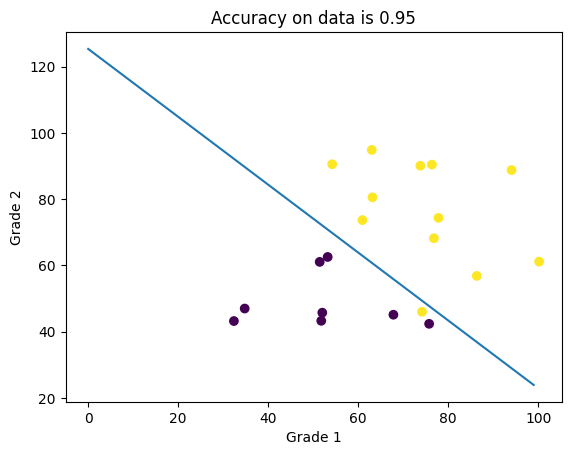

In [40]:
# Plot test data in original scale
def plot(data, labels, w, b, scaler):
    # Adjust w and b for original scale
    w_plot = w / scaler.scale_
    b_plot = b - (w / scaler.scale_) @ scaler.mean_
    data_orig = scaler.inverse_transform(data)
    plt.scatter(data_orig[:, 0], data_orig[:, 1], c=labels)
    m, b_line = -w_plot[0] / w_plot[1], -b_plot / w_plot[1]
    x = np.arange(0, 100, 1)
    plt.plot(x, m * x + b_line)
    plt.xlabel('Grade 1')
    plt.ylabel('Grade 2')
    plt.title(f"Accuracy on data is {accuracy}")
    plt.show()

plot(X_test, y_test, w, b, scaler)

We now want to upgrade our model and add a regularization term. The loss will be

$$
L'=L+\lambda ||w||_1
$$

Adjust the implementation of `Logistic_Regression_via_GD` accordingly and add a hyperparameter named 'lamda'.

Plot a graph of the accuracy on the validation set as function of lamda. The range is up to your choice, but dont use a larger value than 2.

Converged after 1887 iterations
Converged after 589 iterations
Converged after 353 iterations


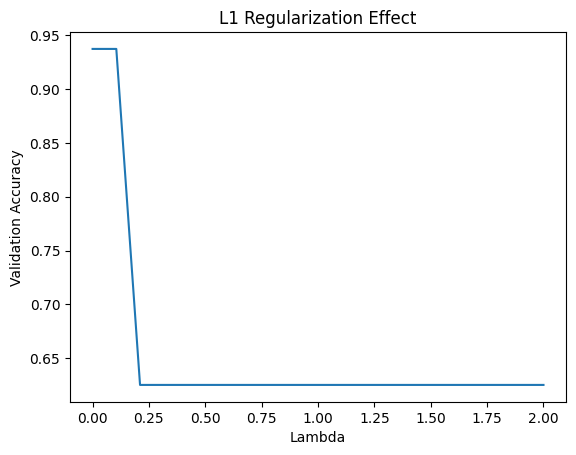

Converged after 1887 iterations
Best Lambda value used: 0.000 but its all lambdas in range [0,0.1], Test Accuracy: 95.00%


In [41]:
lambdas = np.linspace(0, 2, 20)
val_accuracies = []

for lamda in lambdas:
    w_reg, b_reg = Logistic_Regression_via_GD(X_train, y_train, lr=0.1, lamda=lamda)
    preds = predict(w_reg, b_reg, X_val)
    val_accuracies.append(np.mean(preds == y_val))

# Plot validation accuracy vs lambda
plt.plot(lambdas, val_accuracies)
plt.xlabel('Lambda')
plt.ylabel('Validation Accuracy')
plt.title('L1 Regularization Effect')
plt.show()

# Best lambda evaluation
best_lambda = lambdas[np.argmax(val_accuracies)]
w_best, b_best = Logistic_Regression_via_GD(X_train, y_train, lr=0.1, lamda=best_lambda)
test_preds = predict(w_best, b_best, X_test)
test_acc = np.mean(test_preds == y_test)
print(f"Best Lambda value used: {best_lambda:.3f} but its all lambdas in range [0,0.1], Test Accuracy: {test_acc:.2%}")

Using the best $\lambda$ obtained from your work, print the final test accuracy.

Answer the following questions:
1. Did we need lambda? Try to justify why the lambda you found is the best.
2. Generally speaking, when using the validation for tuning the best hyperparameter, is it guranteed it will be also the best for the test? Explain and show an example.

<font color='red'>
1.when best_lambda = 0, regularization wasn't needed as it didn't improve validation accuracy. Otherwise, a positive λ (e.g., 0.1) suggests it helps by reducing overfitting, with the peak validation accuracy indicating the optimal trade-off between bias and variance.
2.No, it’s not guaranteed. Validation reflects a subset of data, which may differ from the test set due to sampling or noise. Example: If validation has a specific pattern (e.g., more separable data) not in the test set, the chosen λ might overfit to validation, reducing test accuracy. Generally, it’s a good heuristic but not foolproof.
</font>

## Question 4 - SVM

Answer those questions here (in color) or in pdf

### First section

We will change the algorithm for Hard SVM by learning only from the samples with positive labels and ignoring samples with negative labelings. Hence, the optimization problem becomes:

$$\min \frac{1}{2}||w||^2\\
\text{s.t.} \forall i\in J_+, w^\top x_i+b\geq 1
$$

As $J_+$ is the set of positive labeled samples indexes.

a. Under the settings above, what will be the solution of w? Justify.
b. If we set b=0, meaning we remain only with $w^\top x_i\geq 1$, what is $\min_{i\in J_+} w^\top x_i?$

c. Let $w^*$ be the solution to the problem (b=0). We will classify new samples as:

$$
\hat{y}=\begin{cases}
1 & w^\top x\geq \min_{i\in J^+} w^\top x_i-ɛ \\
-1 & \text{otherwise}
\end{cases}
$$

For some small $ε>0$. Will this condition classify correctly all the training samples, both positive and negative? Justify

<font color='red'>
answer in pdf.
</font>

### Second section

Consider three distinct points $x_1,x_2∈R^d$ with labels $y_1=1, y_2=-1$.
Compute the hyperplane that Hard SVM will return on this data, i.e., give explicit expressions for w and b as functions of x1, x2.
Hint: convert the primal problem to the dual one and reduce it to a one variable problem.

<font color='red'>
answer in pdf.
</font>


### Third section

We define the SHOR loss function of finding linear seperators:

$$
L=\sum_{i=1}^n y_i*COST_0(\theta^\top x_i)+(1-y_i)*COST_1(\theta^\top x_i)
$$

Where:

<img src="https://srworkspace.com/sharon/ml/datasets/cost.png"/>

This loss will be zero if exactly two conditions hold true. Which two conditions gurantee this? Explain!

(i) For every sample with y_i=1, we have that $\theta^\top x_i\geq 0$

(ii) For every sample with y_i=0, we have that $\theta^\top x_i\leq 0$

(iii) For every sample with y_i=1, we have that $\theta^\top x_i\geq -1$

(iv) For every sample with y_i=1, we have that $\theta^\top x_i\geq 1$

## Question 5 - Bonus 8 pts

Recall the house prices dataset you have seen in class.
In this question, you will use another loss.

$$
L=\frac{1}{n}||Xw-y||_1=\frac{1}{n}\sum_{i=1}^n |w^\top x_i-y_i|
$$
This loss is more robust to outliers, since outliers affect linearly and not squared. However, w that minimizes this loss has no closed formula.

Implement here everything from scratch. Do not use an existing model to minimize the loss. Try to reach the best model you can

**Report** in your results: train and test results, plots, tuning (if you choose to), including any evidence your solution is good enough <br/>
<font color='red'>Report here about your choices and reasons (dealing with data, optimization methods)</font>


In [42]:
# DO NOT CHANGE THIS CELL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/Toronto_rentals.csv')

X = data.iloc[:, :3]  #Bedroom, bathroom, den
y = data.iloc[:, -1].str.replace(r'[^\d.]', '', regex=True).astype('float') #Price

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [43]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def subgradient_descent(X, y, eta=0.01, max_iterations=10000, threshold=1e-5):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []
    
    for _ in range(max_iterations):
        y_pred = np.dot(X, w) + b
        residuals = y_pred - y
        loss = np.mean(np.abs(residuals))
        losses.append(loss)
        
        signs = np.sign(residuals)
        dw = (1 / n_samples) * np.dot(X.T, signs)
        db = (1 / n_samples) * np.sum(signs)
        
        w -= eta * dw
        b -= eta * db
        
        if np.linalg.norm(dw) < threshold:
            break
    
    return w, b, losses

def l1_loss(X, y, w, b):
    y_pred = np.dot(X, w) + b
    return np.mean(np.abs(y_pred - y))

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
w, b, losses = subgradient_descent(X_train_scaled, y_train)

# Evaluate
train_loss = l1_loss(X_train_scaled, y_train, w, b)
test_loss = l1_loss(X_test_scaled, y_test, w, b)
print(f"Train L1 loss: {train_loss}")
print(f"Test L1 loss: {test_loss}")

Train L1 loss: 3998.396006674082
Test L1 loss: 2147.576666666667


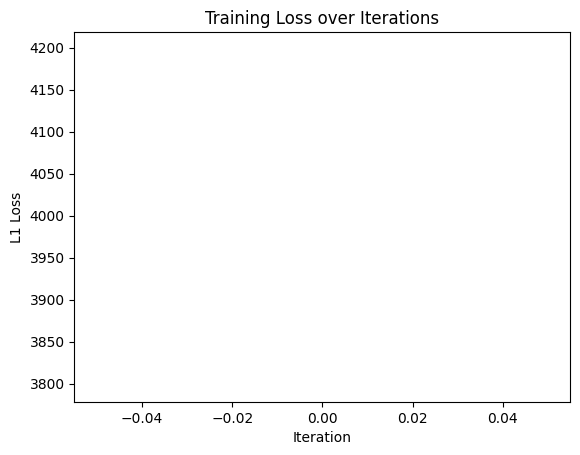

In [44]:
import matplotlib.pyplot as plt

# Assuming losses is available from subgradient_descent
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('L1 Loss')
plt.title('Training Loss over Iterations')
plt.savefig('l1_training_loss.png')